In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0
                  id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%    187499.750000      28.000000     164.000000      63.000000   
50%    374999.500000      40.000000     174.000000      74.000000   
75%    562499.250000      52.000000     185.00000

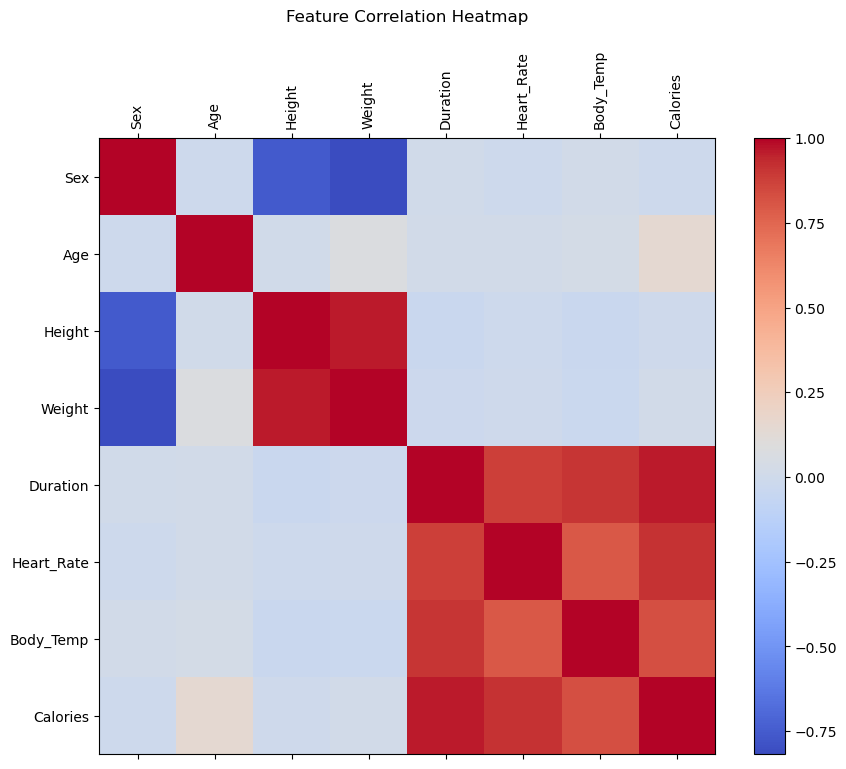

In [1]:
# Load and Explore Data
train_df = pd.read_csv("train.csv")
print(train_df.head())
print(train_df.describe())
print(train_df.info())

# Encode categorical 'Sex' column
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})

# Plot correlation heatmap using matplotlib
corr_matrix = train_df.drop(columns=["id"]).corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
fig.colorbar(cax)
plt.title("Feature Correlation Heatmap", pad=20)
plt.show()

In [2]:
# Preprocess Data
X = train_df.drop(["Calories", "id"], axis=1)
y = train_df["Calories"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression().fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# Model Evaluation
models = [lr, dt, rf]
for model in models:
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R^2:", r2_score(y_test, y_pred))
    print("-" * 30)

test_df = pd.read_csv("test.csv")
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})
test_ids = test_df["id"]
test_features = test_df.drop("id", axis=1)
test_scaled = scaler.transform(test_features)
test_pca = pca.transform(test_scaled)

# Use the best model (e.g., Random Forest)
test_preds = rf.predict(test_pca)

# Format and export
submission = pd.DataFrame({
    "id": test_ids,
    "Calories": test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")


LinearRegression
RMSE: 18.740648112910375
MAE: 14.766640904497343
R^2: 0.9093790704847966
------------------------------
DecisionTreeRegressor
RMSE: 9.89882174802288
MAE: 6.9737488730158725
R^2: 0.9747171337112599
------------------------------
RandomForestRegressor
RMSE: 7.191342072885022
MAE: 5.075636481770082
R^2: 0.9866562101043663
------------------------------
Submission file saved as submission.csv
